In [ ]:
# import pandas as pd
# import glob
# import os

# # =========================
# # 0. 경로 설정
# # =========================
# DATA_DIR = "../food"
# csv_files = sorted(glob.glob(os.path.join(DATA_DIR, "*.csv")))

# print(f"총 파일 수: {len(csv_files)}")

# # =========================
# # 1. 연령대 매핑 함수
# # =========================
# def age_bucket(code):
#     if code == 3:
#         return "20대"
#     elif code == 4:
#         return "30대"
#     elif code == 5:
#         return "40대"
#     elif code in [1, 2]:
#         return "10대이하"
#     else:
#         return "50대+"

# # =========================
# # 2. 전처리 함수
# # =========================
# def preprocess_chunk(chunk):
#     chunk["month"] = chunk["ta_ymd"].astype(str).str[:6]
#     chunk["age_group"] = chunk["age"].apply(age_bucket)
#     return chunk

# # =========================
# # 3. 전체 CSV 순회 + 집계
# # =========================
# records = []

# USECOLS = ["ta_ymd", "age", "card_tpbuz_nm_2", "amt"]

# for file in csv_files:
#     print(f"Processing: {os.path.basename(file)}")

#     for chunk in pd.read_csv(
#         file,
#         usecols=USECOLS,
#         chunksize=200_000
#     ):
#         chunk = preprocess_chunk(chunk)

#         grouped = (
#             chunk
#             .groupby(["month", "age_group", "card_tpbuz_nm_2"])["amt"]
#             .sum()
#             .reset_index()
#         )

#         records.append(grouped)

# # =========================
# # 4. 최종 통합 데이터
# # =========================
# df_final = (
#     pd.concat(records)
#     .groupby(["month", "age_group", "card_tpbuz_nm_2"])["amt"]
#     .sum()
#     .reset_index()
# )

# print("완료")
# print(df_final.head())
# print(f"최종 row 수: {len(df_final)}")


In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Windows (가장 안정적)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
from collections import defaultdict
import pandas as pd
import glob
import os

DATA_DIR = "../food"
csv_files = sorted(glob.glob(os.path.join(DATA_DIR, "*.csv")))

agg_result = defaultdict(int)

def age_bucket(code):
    if code == 3:
        return "20대"
    elif code == 4:
        return "30대"
    elif code == 5:
        return "40대"
    elif code in [1, 2]:
        return "10대이하"
    else:
        return "50대+"

for file in csv_files:
    print(f"Processing: {os.path.basename(file)}")

    for chunk in pd.read_csv(
        file,
        usecols=["ta_ymd", "age", "card_tpbuz_nm_2", "amt"],
        chunksize=200_000
    ):
        chunk["month"] = chunk["ta_ymd"].astype(str).str[:6]
        chunk["age_group"] = chunk["age"].apply(age_bucket)

        s = (
            chunk
            .groupby(["month", "age_group", "card_tpbuz_nm_2"])["amt"]
            .sum()
        )

        for k, v in s.items():
            agg_result[k] += v

Processing: 202201.csv
Processing: 202202.csv
Processing: 202203.csv
Processing: 202204.csv
Processing: 202205.csv
Processing: 202206.csv
Processing: 202207.csv
Processing: 202208.csv
Processing: 202209.csv
Processing: 202210.csv
Processing: 202211.csv
Processing: 202212.csv
Processing: 202301.csv
Processing: 202302.csv
Processing: 202303.csv
Processing: 202304.csv
Processing: 202305.csv
Processing: 202306.csv
Processing: 202307.csv
Processing: 202308.csv
Processing: 202309.csv
Processing: 202310.csv
Processing: 202311.csv
Processing: 202312.csv
Processing: 202401.csv
Processing: 202402.csv
Processing: 202403.csv
Processing: 202404.csv
Processing: 202405.csv
Processing: 202406.csv
Processing: 202407.csv
Processing: 202408.csv
Processing: 202409.csv
Processing: 202410.csv
Processing: 202411.csv
Processing: 202412.csv
Processing: 202501.csv
Processing: 202502.csv
Processing: 202503.csv
Processing: 202504.csv
Processing: 202505.csv
Processing: 202506.csv
Processing: 202507.csv
Processing:

In [3]:
df_final = (
    pd.Series(agg_result)
    .reset_index()
    .rename(columns={
        "level_0": "month",
        "level_1": "age_group",
        "level_2": "card_tpbuz_nm_2",
        0: "amt"
    })
)

In [4]:
df_final

,month,age_group,card_tpbuz_nm_2,amt
0,202201,10대이하,간이주점,605412532
1,202201,10대이하,고기요리,295738233
2,202201,10대이하,닭/오리요리,356237881
3,202201,10대이하,별식/퓨전요리,86811756
4,202201,10대이하,분식,369239831
...,...,...,...,...
2815,202511,50대+,제과/제빵/떡/케익,25629391043
2816,202511,50대+,중식,12462543021
2817,202511,50대+,커피/음료,31907039569
2818,202511,50대+,패스트푸드,12205771126


In [5]:
import os

OUTPUT_DIR = "../output"
os.makedirs(OUTPUT_DIR, exist_ok=True)

df_age_out = df_final.copy()

df_age_out.to_csv(
    f"{OUTPUT_DIR}/age_category_summary_202201_202511.csv",
    index=False,
    encoding="utf-8-sig"
)


In [6]:
pivot = (
    df_final
    .groupby(["age_group", "card_tpbuz_nm_2"])["amt"]
    .sum()
    .unstack(fill_value=0)
)

pivot

card_tpbuz_nm_2,간이주점,고기요리,닭/오리요리,별식/퓨전요리,분식,양식,일식/수산물,제과/제빵/떡/케익,중식,커피/음료,패스트푸드,한식
age_group,,,,,,,,,,,,
10대이하,12986875663,10926750501,11405380205,5351426706,16410261397,6337579564,6005157441,7463493877,9616399398,39975851993,19199238343,36220940137
20대,501521252594,544285213333,325136187283,180174898296,238207073709,150796048607,345261467513,213980645869,161916080187,703615774728,317379291691,1441577356225
30대,535080560999,969826426079,472327182108,327759671646,419686113609,269078655207,675506963814,487213961734,303670913210,1061958472055,437349883166,2634023478596
40대,547675290555,1282834656840,703409377130,448697260960,651233180674,322025071935,975948903055,698167989608,438516521340,1238221284136,527575846710,3600854244750
50대+,561521045880,2024228741021,1071129593967,737412792829,942645747052,304876996851,1980278809911,1092325273403,570026440452,1406481857361,520859415434,6519161109880


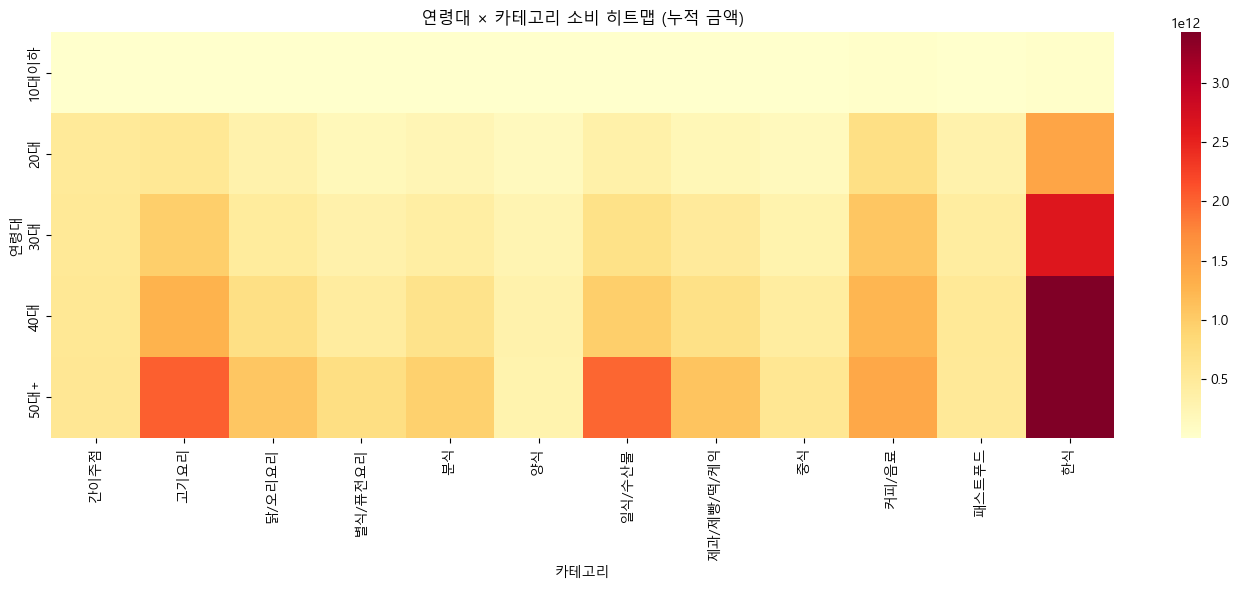

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 누적 집계
pivot_amt = (
    df_final
    .groupby(["age_group", "card_tpbuz_nm_2"])["amt"]
    .sum()
    .unstack(fill_value=0)
)

plt.figure(figsize=(14, 6))
sns.heatmap(
    pivot_amt,
    cmap="YlOrRd",
    robust=True
)

plt.title("연령대 × 카테고리 소비 히트맵 (누적 금액)")
plt.xlabel("카테고리")
plt.ylabel("연령대")
plt.tight_layout()
plt.show()


In [8]:
pivot_z = pivot_amt.sub(pivot_amt.mean(axis=1), axis=0) \
                   .div(pivot_amt.std(axis=1), axis=0)                 
pivot_z

card_tpbuz_nm_2,간이주점,고기요리,닭/오리요리,별식/퓨전요리,분식,양식,일식/수산물,제과/제빵/떡/케익,중식,커피/음료,패스트푸드,한식
age_group,,,,,,,,,,,,
10대이하,-0.188360,-0.367067,-0.325548,-0.850702,0.108604,-0.765158,-0.793994,-0.667489,-0.480734,2.152817,0.350536,1.827095
20대,0.205802,0.323882,-0.281232,-0.681500,-0.521261,-0.762621,-0.225662,-0.588155,-0.731916,0.763826,-0.302651,2.801487
30대,-0.277117,0.388335,-0.373171,-0.594456,-0.453747,-0.684277,-0.062170,-0.350384,-0.631328,0.529358,-0.426710,2.935666
40대,-0.456144,0.371332,-0.280854,-0.567551,-0.339582,-0.710129,0.025909,-0.286753,-0.579010,0.321116,-0.478767,2.980431
50대+,-0.545021,0.325236,-0.241822,-0.440372,-0.318265,-0.697714,0.299088,-0.229212,-0.539960,-0.042300,-0.569213,2.999555


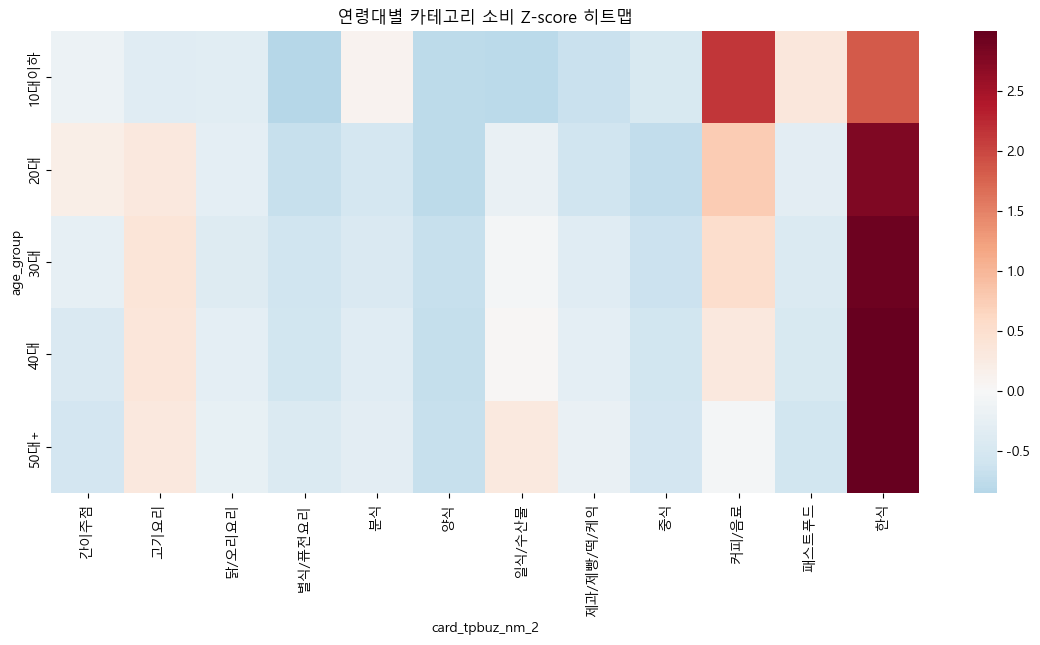

In [15]:
plt.figure(figsize=(14, 6))
sns.heatmap(
    pivot_z,
    cmap="RdBu_r",
    center=0
)

plt.title("연령대별 카테고리 소비 Z-score 히트맵")
plt.show()

In [10]:
pivot_z_clipped = pivot_z.clip(-2, 2)
pivot_z_clipped

card_tpbuz_nm_2,간이주점,고기요리,닭/오리요리,별식/퓨전요리,분식,양식,일식/수산물,제과/제빵/떡/케익,중식,커피/음료,패스트푸드,한식
age_group,,,,,,,,,,,,
10대이하,-0.188360,-0.367067,-0.325548,-0.850702,0.108604,-0.765158,-0.793994,-0.667489,-0.480734,2.000000,0.350536,1.827095
20대,0.205802,0.323882,-0.281232,-0.681500,-0.521261,-0.762621,-0.225662,-0.588155,-0.731916,0.763826,-0.302651,2.000000
30대,-0.277117,0.388335,-0.373171,-0.594456,-0.453747,-0.684277,-0.062170,-0.350384,-0.631328,0.529358,-0.426710,2.000000
40대,-0.456144,0.371332,-0.280854,-0.567551,-0.339582,-0.710129,0.025909,-0.286753,-0.579010,0.321116,-0.478767,2.000000
50대+,-0.545021,0.325236,-0.241822,-0.440372,-0.318265,-0.697714,0.299088,-0.229212,-0.539960,-0.042300,-0.569213,2.000000


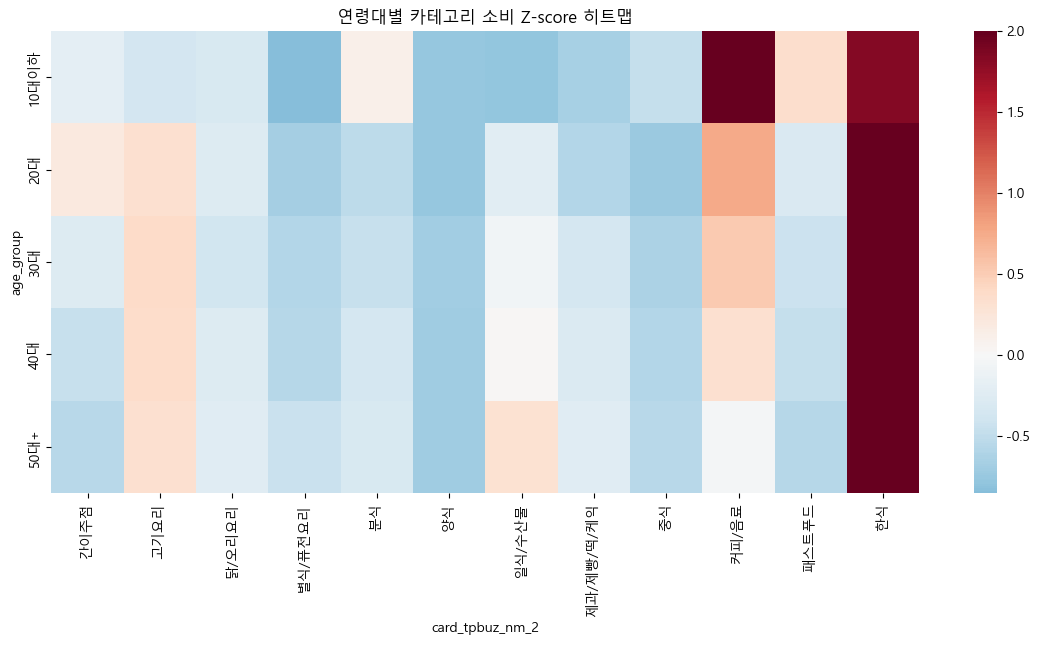

In [16]:
plt.figure(figsize=(14, 6))
sns.heatmap(
    pivot_z_clipped,
    cmap="RdBu_r",
    center=0
)

plt.title("연령대별 카테고리 소비 Z-score 히트맵")
plt.show()

In [12]:
TOP_N = 3

top_trend = (
    pivot_z_clipped
    .apply(lambda row: row.nlargest(TOP_N).index.tolist(), axis=1)
)

top_trend

age_group
10대이하    [커피/음료, 한식, 패스트푸드]
20대       [한식, 커피/음료, 고기요리]
30대       [한식, 커피/음료, 고기요리]
40대       [한식, 고기요리, 커피/음료]
50대+     [한식, 고기요리, 일식/수산물]
dtype: object

======================================================================================

In [19]:
import pandas as pd
import glob
import os

# =========================
# 1. CSV 폴더 경로
# =========================
DATA_DIR = "../food"   # ← CSV 폴더 경로로 수정
files = sorted(glob.glob(os.path.join(DATA_DIR, "*.csv")))

print(f"총 파일 수: {len(files)}")

# =========================
# 2. 사용할 컬럼만 지정
# =========================
USECOLS = [
    "ta_ymd",
    "sex",
    "age",
    "card_tpbuz_nm_2",
    "amt"
]

# =========================
# 3. 데이터 누적
# =========================
dfs = []

for file in files:
    print(f"Loading: {os.path.basename(file)}")

    for chunk in pd.read_csv(
        file,
        usecols=USECOLS,
        chunksize=200_000
    ):
        # 월 컬럼 생성
        chunk["month"] = chunk["ta_ymd"].astype(str).str[:6]

        # 연령대 정제
        chunk["age_group"] = chunk["age"].map({
            1: "10대이하", 2: "10대이하",
            3: "20대",
            4: "30대",
            5: "40대",
            6: "50대+",
            7: "50대+",
            8: "50대+",
            9: "50대+",
            10: "50대+",
            11: "50대+"
        })

        dfs.append(chunk)

# =========================
# 4. 하나의 df로 통합
# =========================
df = pd.concat(dfs, ignore_index=True)

print("통합 완료")
print(df.head())
print(f"전체 row 수: {len(df):,}")


총 파일 수: 47
Loading: 202201.csv
Loading: 202202.csv
Loading: 202203.csv
Loading: 202204.csv
Loading: 202205.csv
Loading: 202206.csv
Loading: 202207.csv
Loading: 202208.csv
Loading: 202209.csv
Loading: 202210.csv
Loading: 202211.csv
Loading: 202212.csv
Loading: 202301.csv
Loading: 202302.csv
Loading: 202303.csv
Loading: 202304.csv
Loading: 202305.csv
Loading: 202306.csv
Loading: 202307.csv
Loading: 202308.csv
Loading: 202309.csv
Loading: 202310.csv
Loading: 202311.csv
Loading: 202312.csv
Loading: 202401.csv
Loading: 202402.csv
Loading: 202403.csv
Loading: 202404.csv
Loading: 202405.csv
Loading: 202406.csv
Loading: 202407.csv
Loading: 202408.csv
Loading: 202409.csv
Loading: 202410.csv
Loading: 202411.csv
Loading: 202412.csv
Loading: 202501.csv
Loading: 202502.csv
Loading: 202503.csv
Loading: 202504.csv
Loading: 202505.csv
Loading: 202506.csv
Loading: 202507.csv
Loading: 202508.csv
Loading: 202509.csv
Loading: 202510.csv
Loading: 202511.csv


MemoryError: Unable to allocate 3.41 GiB for an array with shape (2, 229110394) and data type int64

In [ ]:
# 소비 비중 히트맵 (연령대 × 카테고리)

import seaborn as sns
import matplotlib.pyplot as plt

# 연령대별 총 소비
age_total = df.groupby("age_group")["amt"].sum()

# 연령대 × 카테고리 소비 비중
ratio_df = (
    df.groupby(["age_group", "card_tpbuz_nm_2"])["amt"]
      .sum()
      .div(age_total, level=0)
      .reset_index()
)

pivot_ratio = ratio_df.pivot(
    index="age_group",
    columns="card_tpbuz_nm_2",
    values="amt"
)

plt.figure(figsize=(14, 6))
sns.heatmap(
    pivot_ratio,
    cmap="YlGnBu",
    annot=False
)
plt.title("연령대 × 카테고리 소비 비중")
plt.show()


NameError: name 'df' is not defined

In [ ]:
# 월별 성장률 분석 (트렌드 핵심)

# 월별 카테고리 소비
monthly = (
    df.groupby(["month", "card_tpbuz_nm_2"])["amt"]
      .sum()
      .reset_index()
      .sort_values(["card_tpbuz_nm_2", "month"])
)

# 월간 성장률
monthly["growth_rate"] = (
    monthly.groupby("card_tpbuz_nm_2")["amt"]
           .pct_change()
)

# 최근 6개월 평균 성장률
trend_score = (
    monthly.dropna()
           .groupby("card_tpbuz_nm_2")["growth_rate"]
           .mean()
           .sort_values(ascending=False)
)

trend_score.head(10)


In [ ]:
# 변동성 지표 (안정형 vs 트렌드형)

# 월별 Z-score 계산 (카테고리 기준)
monthly["z_score"] = (
    monthly.groupby("card_tpbuz_nm_2")["amt"]
           .transform(lambda x: (x - x.mean()) / x.std())
)

# 카테고리별 변동성 (표준편차)
volatility = (
    monthly.groupby("card_tpbuz_nm_2")["z_score"]
           .std()
           .sort_values(ascending=False)
)

volatility


In [ ]:
import pandas as pd
import glob
import os

DATA_DIR = "../food"
files = sorted(glob.glob(os.path.join(DATA_DIR, "*.csv")))

USECOLS = ["ta_ymd", "sex", "age", "card_tpbuz_nm_2", "amt"]

result = []

for file in files:
    print(f"Processing {os.path.basename(file)}")

    for chunk in pd.read_csv(
        file,
        usecols=USECOLS,
        chunksize=200_000
    ):
        # 월
        chunk["month"] = chunk["ta_ymd"].astype(str).str[:6]

        # 연령대
        chunk["age_group"] = chunk["age"].map({
            1: "10대이하", 2: "10대이하",
            3: "20대",
            4: "30대",
            5: "40대",
            6: "50대+",
            7: "50대+",
            8: "50대+",
            9: "50대+",
            10: "50대+",
            11: "50대+"
        })

        # 🔥 바로 집계
        grouped = (
            chunk
            .groupby(["month", "sex", "age_group", "card_tpbuz_nm_2"], observed=True)
            ["amt"]
            .sum()
            .reset_index()
        )

        result.append(grouped)

# 🔥 여기서는 이미 집계된 데이터만 concat
df = (
    pd.concat(result, ignore_index=True)
    .groupby(["month", "sex", "age_group", "card_tpbuz_nm_2"], observed=True)
    ["amt"]
    .sum()
    .reset_index()
)

print("완료")
print(df.head())
print(df.shape)
